# House Price Prediction 

#### About 

This dataset describes the various features of houses and their prices, it consists of 3 files:

 1- train.csv

        it has 81 columns and 1460 observations

 2- test.csv 

        it has 80 columns (doesn't include the saleprice) and 1459 observations 

 3- sample_submission.csv

        it has 2 columns only and 1459 row which states the sale price for the test.csv


#### Features 

the full description for all features is in the data_description.txt file 


Step 1 : import libraries

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime
import scipy.stats as stats
import plotly.graph_objects as go
import sklearn
from scipy.stats import f_oneway

In [179]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.utils import to_categorical

Step 2 : Load dataset

In [180]:
train = pd.read_csv("train.csv")

In [181]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


the dataset columns:

In [182]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [183]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

the figure below demonstrate each variables and their values

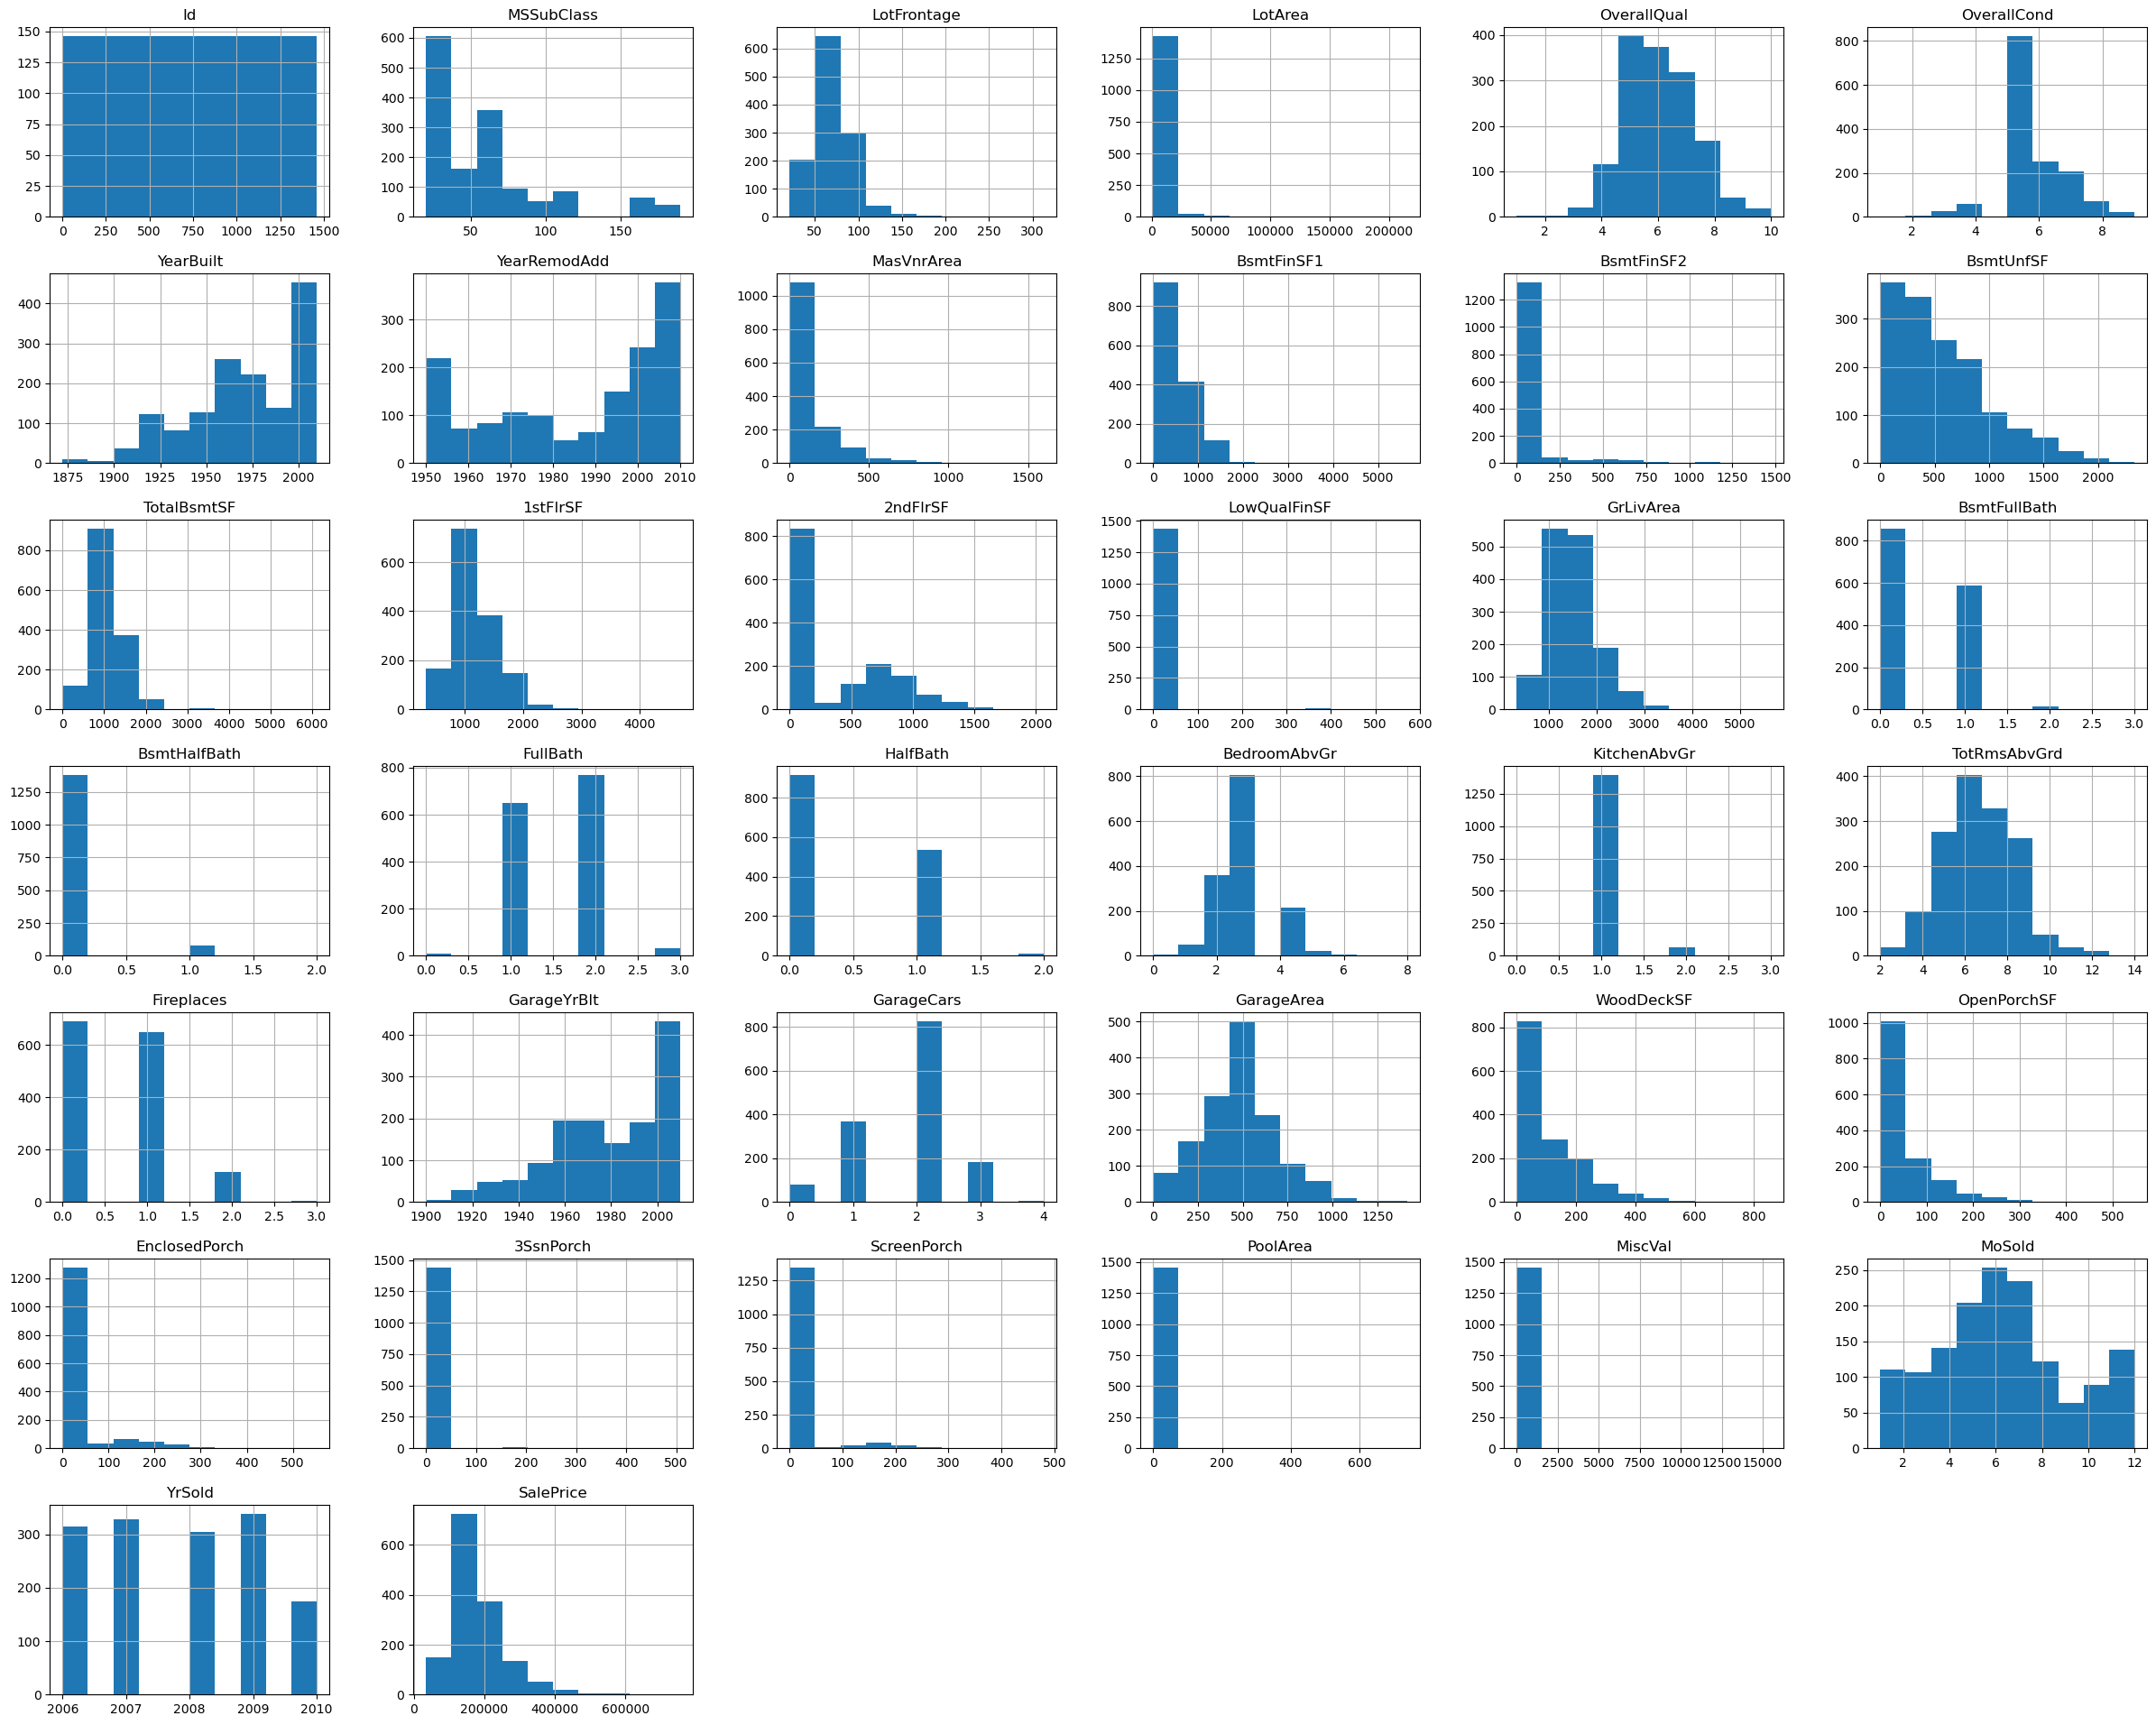

In [185]:
train.hist(figsize=(30,24))
plt.show()

In [186]:
fig = px.histogram(train, x="SalePrice")
fig.show()

In [187]:
train['SalePrice'].skew()

1.8828757597682129

the salePrice is positively skewed distribution

In [188]:
#train['SalePrice'] = train['SalePrice']**(1/3)

tried to do the cube root to solve the skwness but the results weren't great

## Cleaning the data

drop duplicates but there are no duplicates in the dataset

In [189]:
train.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


##### Exploring null values 

different ways will be followed to deal with null values

In [190]:
null_count=train.isnull().sum()
null_count.sort_values(ascending=False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

the columns with more than 40% null values will be dropped

In [191]:
train.drop(['Alley','MiscFeature','Fence','PoolQC','FireplaceQu'], axis=1, inplace=True)

the rest will be filled with default values such as, mean or statement 

In [192]:
LotMean = train[train['LotFrontage'].isna()==False]['LotFrontage'].mean()
MasVnrAreaMean = train[train['MasVnrArea'].isna()==False]['MasVnrArea'].mean()

values = {"LotFrontage": LotMean, "MasVnrArea": MasVnrAreaMean, "BsmtExposure":'No Basement', 
"BsmtQual": 'No Basement', "BsmtCond":'No Basement', "BsmtFinType1":'No Basement',
"MasVnrType":'None'}
train.fillna(value=values,inplace=True)

the rows where there is no garage and should not be filled with mean will be dropped

In [193]:
train.dropna(subset=['GarageYrBlt'],axis=0,inplace=True)

In [194]:
train.dropna(subset=['BsmtFinType2'],axis=0,inplace=True)

some columns have multiple classes but the majority of its observations are under one class which reduce variance 

so, any column with more than 75% of data in one class will be dropped

In [195]:
def mostClass(colList):
    for colName in colList:
        topclass = train.groupby(colName).size().max()
        if topclass/train.shape[0] >= 0.75:
            train.drop([colName], axis=1, inplace=True)
            print(colName+" dropped")

In [196]:
mostClass(train.columns)

MSZoning dropped
Street dropped
LandContour dropped
Utilities dropped
LandSlope dropped
Condition1 dropped
Condition2 dropped
BldgType dropped
RoofStyle dropped
RoofMatl dropped
ExterCond dropped
BsmtCond dropped
BsmtFinType2 dropped
BsmtFinSF2 dropped
Heating dropped
CentralAir dropped
Electrical dropped
LowQualFinSF dropped
BsmtHalfBath dropped
KitchenAbvGr dropped
Functional dropped
GarageQual dropped
GarageCond dropped
PavedDrive dropped
EnclosedPorch dropped
3SsnPorch dropped
ScreenPorch dropped
PoolArea dropped
MiscVal dropped
SaleType dropped
SaleCondition dropped


the graph below shows the correlation between the salePrice and other numerical features

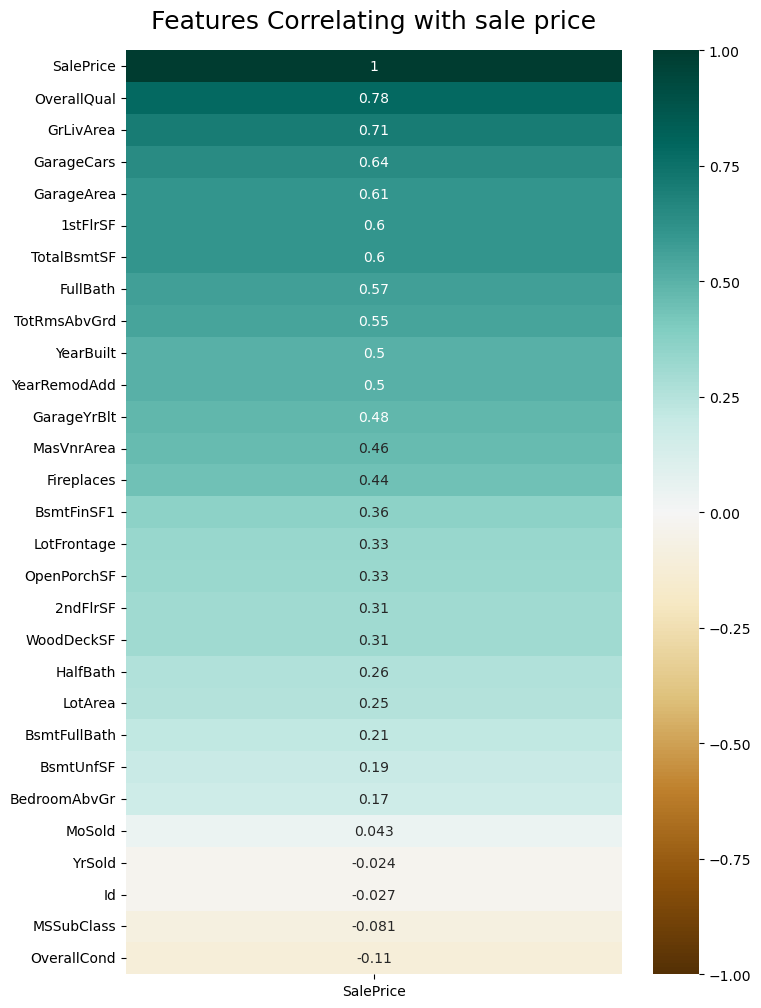

In [197]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with sale price', fontdict={'fontsize':18}, pad=16);

the features with correlation that is between -0.30 - 0.30 will be deleted 

In [198]:
train.drop(['Id','MoSold','BedroomAbvGr','BsmtUnfSF','YrSold','OverallCond','MSSubClass','BsmtFullBath','LotArea','HalfBath'], axis=1, inplace=True)

exploring the unique values of all cateogrical features

In [199]:
def findUnique(colNames):
    for colName in colNames:
        print(colName)
        print(train[colName].unique())

In [200]:
findUnique(list(train.select_dtypes(['object']).columns))

LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'Stucco' 'AsbShng' 'BrkComm' 'Stone' 'ImStucc' 'CBlock']
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
MasVnrType
['BrkFace' 'None' 'Stone' 'BrkCmn']
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Stone']
BsmtQual
['Gd' 'TA' 'Ex' 'Fa']
BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'No Basement']
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec'

split them into 2 groups:categorical and ordinal columns to handle them differently 

In [201]:
categoricalColumns = ['LotConfig','Neighborhood','HouseStyle','Exterior1st','Exterior2nd',
'MasVnrType','Foundation','BsmtFinType1','GarageType','GarageFinish']
OrdinalColumns = ['LotShape', 'ExterQual','BsmtQual','HeatingQC','KitchenQual','BsmtExposure'] 

### Encode Ordinal Features

In [202]:
findUnique(OrdinalColumns)

LotShape
['Reg' 'IR1' 'IR2' 'IR3']
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
BsmtQual
['Gd' 'TA' 'Ex' 'Fa']
HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'No Basement']


In [203]:
def encode_ordinal(col,values):
    for i in range(len(values)):
        train[col].replace({values[i]:i+1},inplace=True)

In [204]:
encode_ordinal('HeatingQC',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [205]:
encode_ordinal('KitchenQual',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [206]:
encode_ordinal('BsmtQual',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [207]:
encode_ordinal('ExterQual',['Po', 'Fa', 'TA', 'Gd', 'Ex'  ])

In [208]:
encode_ordinal('BsmtExposure',['No Basement', 'No',  'Mn', 'Av', 'Gd' ])

In [209]:
encode_ordinal('LotShape',['IR3', 'IR2', 'IR1','Reg' ])

find the correlation between the ordinal and the saleprice

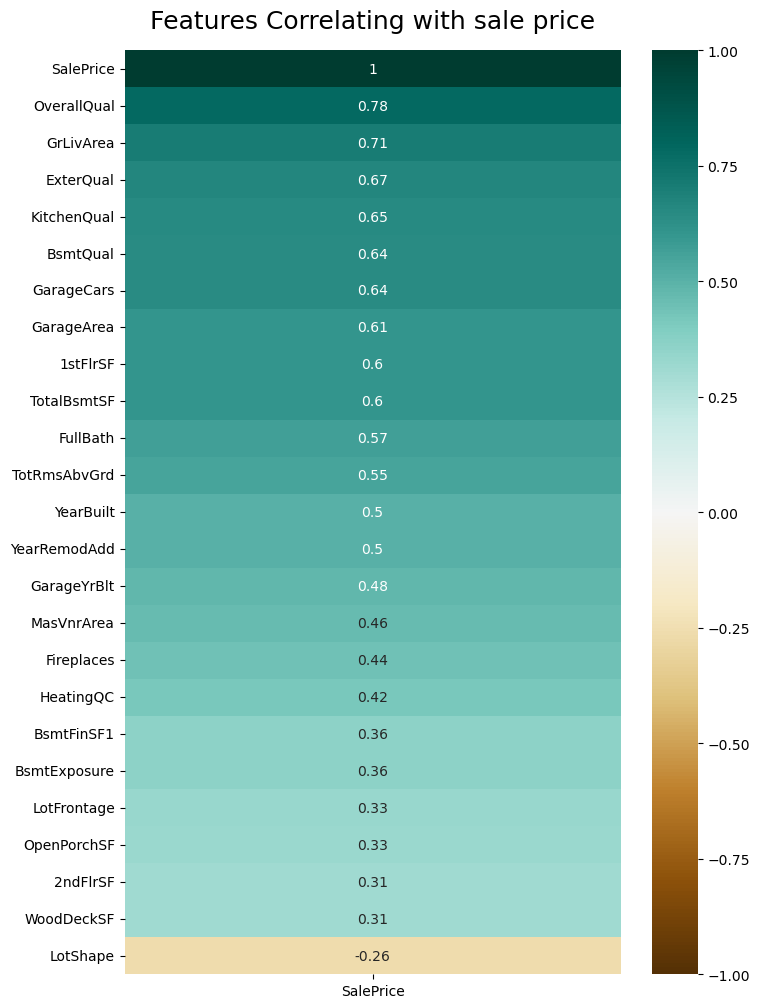

In [210]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with sale price', fontdict={'fontsize':18}, pad=16);

dropped the only ordinal column with correlation less than 0.30

In [211]:
train.drop(['LotShape'], axis=1, inplace=True)

### cateogrical correlation

In [212]:
def findFP(feature):
    j=0
    groups=[]
    categories = pd.unique(train[feature])
    for cate in categories:
        groups.append(train[train[feature] == cate]['SalePrice'])
    f_val, p_val = stats.f_oneway(*groups)
    print("for feature "+feature+" :")
    print(f"F-value: {f_val}, p-value: {p_val}")
    return f_val, p_val

In [213]:
for col in categoricalColumns:
    findFP(col)

for feature LotConfig :
F-value: 6.681227902974071, p-value: 2.529400743862472e-05
for feature Neighborhood :
F-value: 61.51537045137834, p-value: 1.2568915586989974e-195
for feature HouseStyle :
F-value: 16.74894241781509, p-value: 2.6470576497106363e-21
for feature Exterior1st :
F-value: 19.52995650998426, p-value: 1.807103307401155e-42
for feature Exterior2nd :
F-value: 17.1542720008693, p-value: 7.81385622381455e-42
for feature MasVnrType :
F-value: 88.885735289338, p-value: 1.8017156146969907e-52
for feature Foundation :
F-value: 105.11802001506913, p-value: 5.938191816922798e-78
for feature BsmtFinType1 :
F-value: 64.95588103468258, p-value: 7.905706771389728e-61
for feature GarageType :
F-value: 66.79329081252442, p-value: 2.044622428072373e-62
for feature GarageFinish :
F-value: 238.0600610429749, p-value: 3.0763262851978232e-89


In [214]:
train.drop(['LotConfig','HouseStyle','Exterior2nd','Exterior1st','BsmtFinType1'], axis=1, inplace=True)

In [215]:
categoricalColumns = ['Neighborhood','MasVnrType','Foundation','GarageType','GarageFinish']

### encode Categorical features


In [216]:
for col in categoricalColumns:
  train = pd.get_dummies(data = train,prefix=col,columns=[col],drop_first=True)


### deal with outliers

In [217]:
numericalColumns = (train.select_dtypes(['int','float']).columns)

In [218]:
def DeleteOutliers(columns):
    fin= {}
    for col in columns:
        q1 = train.quantile(0.25)
        q3 = train.quantile(0.75)
        iqr = q3 - q1
        cutoff  = 3*iqr
        lower, upper = q1 - cutoff, q3+cutoff
        upperRows = train[train[col] > upper[col]]
        lowerRows = train[train[col] < lower[col]]
        train.drop(upperRows.index, axis=0, inplace=True)
        train.drop(lowerRows.index, axis=0, inplace=True)

delete the rows that have outliers

In [219]:
DeleteOutliers(numericalColumns)

split data

In [220]:
train_dataset = train.sample(frac=0.8, random_state=0)
test_dataset = train.drop(train_dataset.index)

### Normalize values

In [221]:
train_stats = train_dataset.describe()
train_stats.pop('SalePrice')
train_stats = train_stats.transpose()

In [222]:
train_labels = train_dataset.pop('SalePrice')
test_labels = test_dataset.pop('SalePrice')

In [223]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']
normed_train = norm(train_dataset)
normed_test = norm(test_dataset)

### Multiple Linear Regression

building the model using ADAM optimizer and MAE, MSE, and R2 evalution matrics

In [224]:
def build_model():
    model = tf.keras.Sequential([
    layers.Dense(64,activation=tf.nn.relu, input_shape=[len(normed_train.keys())]),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(1)
])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='mse',
        metrics=['mae','mse',tf.keras.metrics.RootMeanSquaredError()])

    return model


In [225]:
model = build_model()

In [226]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                3968      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


making sure that the model works before fitting

In [227]:
example =np.asarray(normed_train[:10]).astype(np.float32)
example_results = model.predict(example)
example_results

1/1 [==============================] - 0s 40ms/step


array([[-0.7838757 ],
       [-0.41708523],
       [-0.8351214 ],
       [-0.14217293],
       [-0.09798018],
       [-1.0105321 ],
       [-0.3130647 ],
       [ 0.14594236],
       [ 0.27048925],
       [-0.36447793]], dtype=float32)

fitting process with 300 epochs (tried until 2000 but 300 was the optimal choice) and 20% validation set for each iteration

In [228]:
history = model.fit(
    normed_train,
    train_labels,
    epochs=300,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [229]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,root_mean_squared_error,val_loss,val_mae,val_mse,val_root_mean_squared_error,epoch
295,611339328.0,18537.601562,611339328.0,24725.277344,775912256.0,21170.316406,775912256.0,27855.201172,295
296,608244224.0,18493.783203,608244224.0,24662.607422,773756480.0,21172.652344,773756480.0,27816.478516,296
297,606320000.0,18469.082031,606320000.0,24623.566406,770921472.0,21122.808594,770921472.0,27765.472656,297
298,603977984.0,18413.277344,603977984.0,24575.962891,768204096.0,21046.416016,768204096.0,27716.494141,298
299,602082112.0,18359.042969,602082112.0,24537.361328,763942656.0,20987.669922,763942656.0,27639.511719,299


### Determining the right number of epochs

In [230]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [saleprice]')
  plt.legend()
  plt.grid(True)

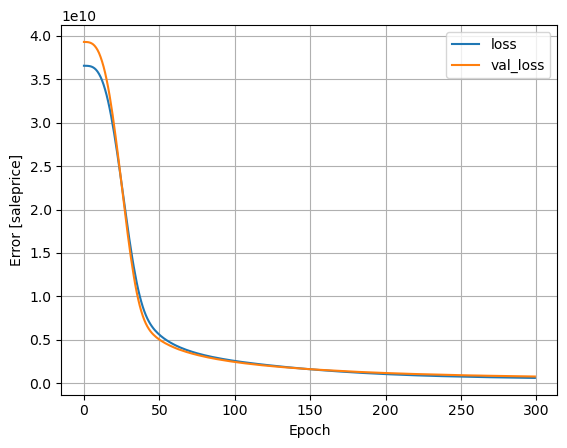

In [231]:
plot_loss(history)

In [232]:
loss,mae,mse,rmse=model.evaluate(normed_test,test_labels,verbose=0)

In [233]:
mae 

21039.181640625

In [234]:
mse

892735808.0

In [235]:
rmse

29878.685546875

9/9 [==============================] - 0s 1ms/step


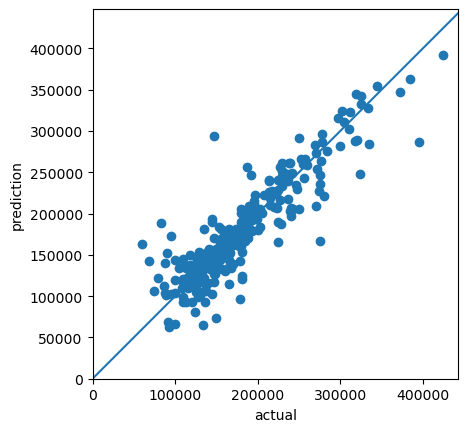

In [236]:
test_predictions = model.predict(normed_test).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-6000000,6000000],[-6000000,6000000])

#### Coefficient of determination

In [237]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(test_labels,test_predictions)
result = metric.result()
result.numpy()

0.79249656

It can be referred that 79% of the changeability of the dependent output attribute can be explained by the model while the remaining 21% of the variability is still unaccounted for. R2 indicates the proportion of data points which lie within the line created by the regression equation. 